# Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset.

Attributes of Smartphone


	battery_power: Total energy a battery can store in one time measured in mAh

	blue: Has Bluetooth or not

	clock_speed: the speed at which microprocessor executes instructions

	dual_sim: Has dual sim support or not

	fc: Front Camera megapixels

	four_g: Has 4G or not

	int_memory: Internal Memory in Gigabytes

	m_dep: Mobile Depth in cm

	mobile_wt: Weight of mobile phone

	n_cores: Number of cores of the processor

	pc: Primary Camera megapixels

	px_height: Pixel Resolution Height

	px_width: Pixel Resolution Width

	ram: Random Access Memory in MegaBytes

	sc_h: Screen Height of mobile in cm

	sc_w: Screen Width of mobile in cm

	talk_time: the longest time that a single battery charge will last when you are constantly talking on the phone

	three_g: Has 3G or not

	touch_screen: Has touch screen or not

	wifi: Has wifi or not

	price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

#To see maximum no of columns
pd.pandas.set_option('display.max_columns',None)

In [3]:
# Reading the train dataset
df_train = pd.read_csv('MobileTrain.csv')

# Reading the test dataset
df_test = pd.read_csv('MobileTest.csv')

In [4]:
# Display first 5 rows of train data
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Display first 5 rows of test data
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [6]:
#Dimensions of dataset
df_train.shape,df_test.shape

((2000, 21), (1000, 21))

In [7]:
#The train data contains 2000 rows and 21 columns

#The test dataset contains 1000 rows and 21 columns

#price_range is the Target variable

In [8]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [10]:
#Basic information about the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [12]:
# Statistical information about the dataset
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [14]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [15]:
df_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [16]:
#The train and test data does not contain any categorical values.All values are numerical type.

In [17]:
# Checking null values in train dataset
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [18]:
# Checking null values in test dataset
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [19]:
# There are no null values present in train and test dataset.

In [20]:
#Number of unique values 
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [21]:
df_test.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

# EDA 

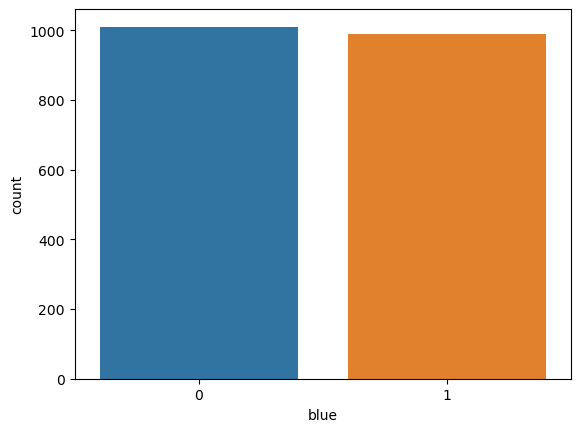

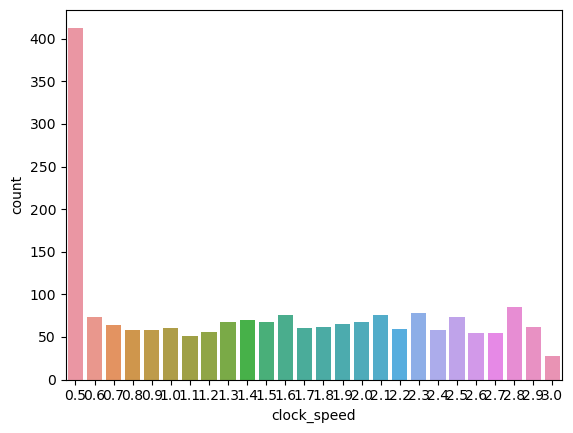

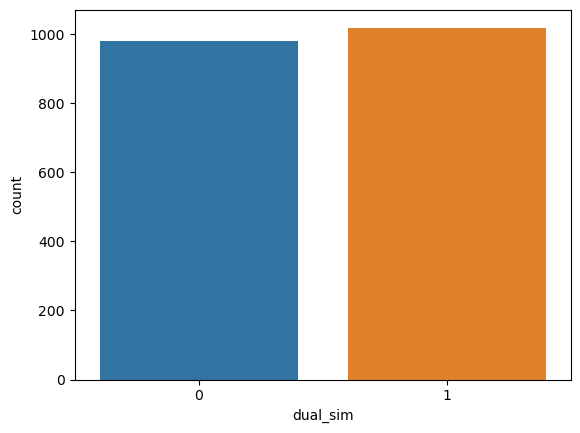

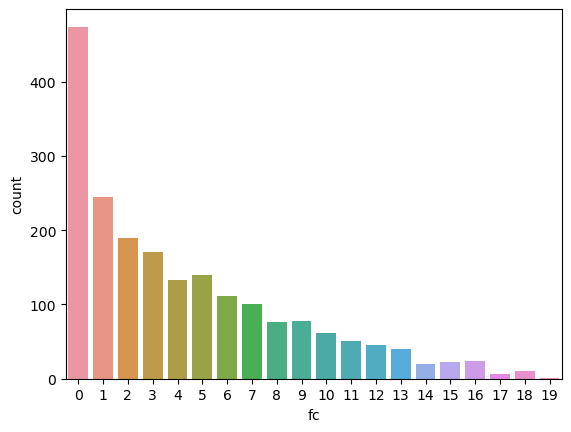

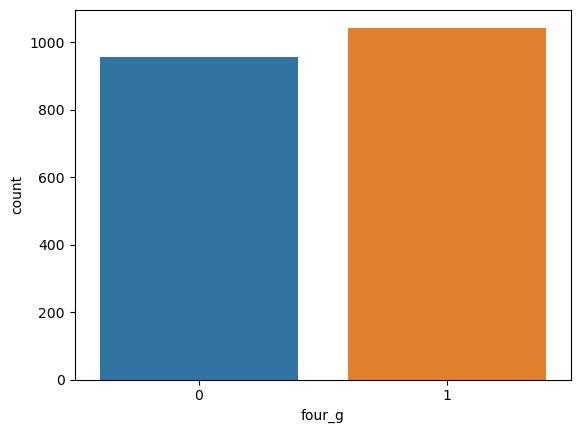

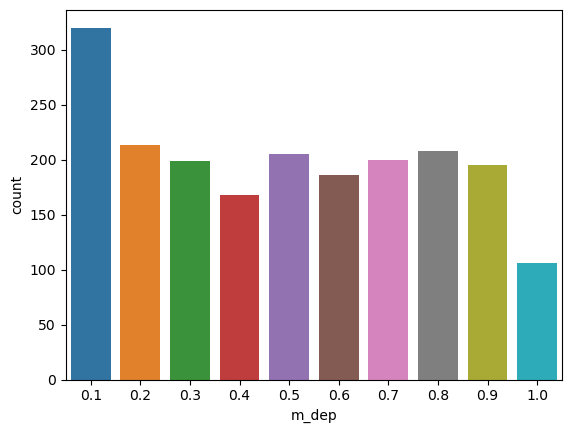

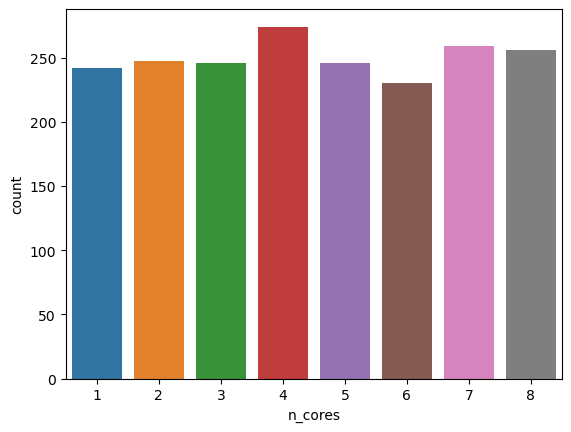

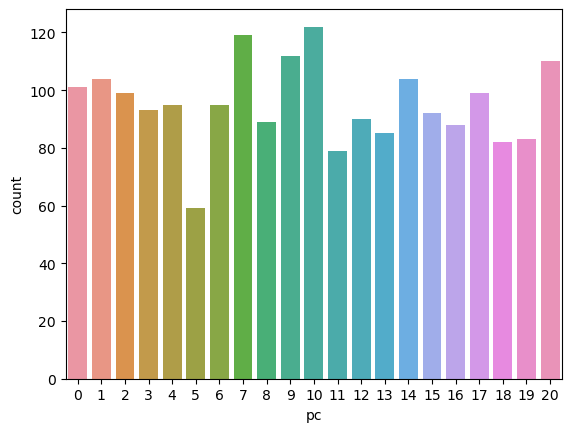

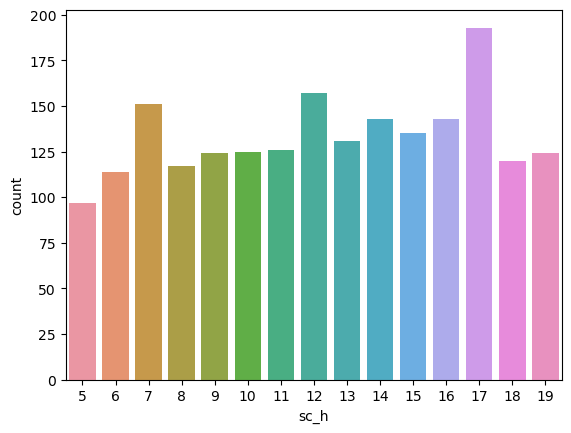

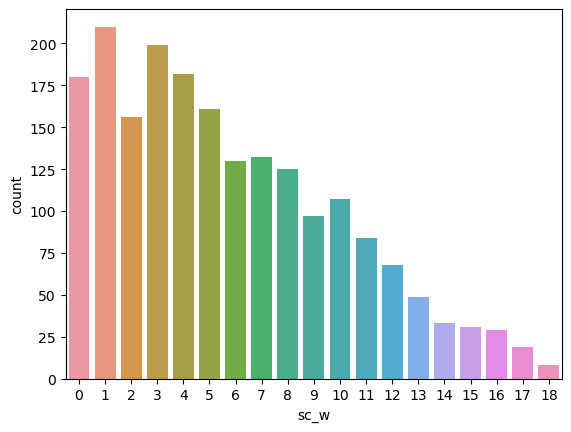

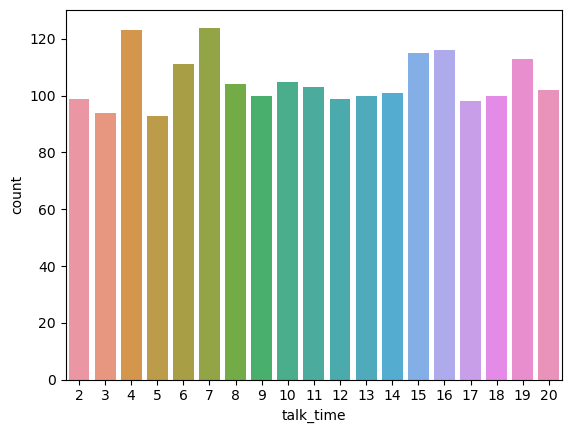

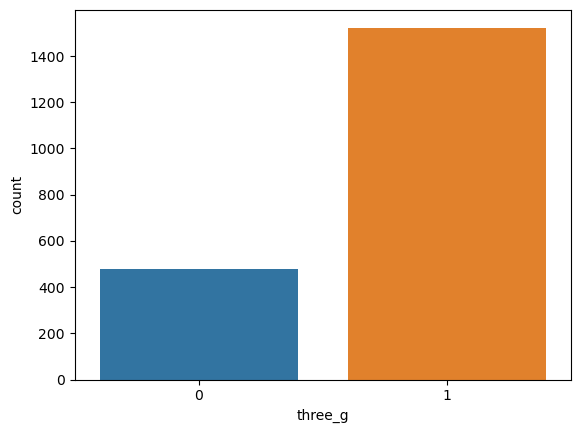

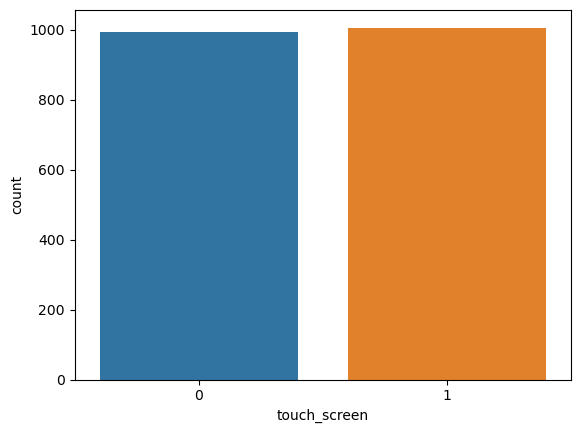

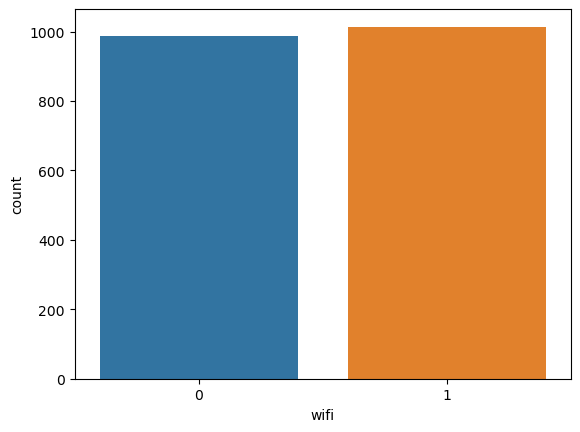

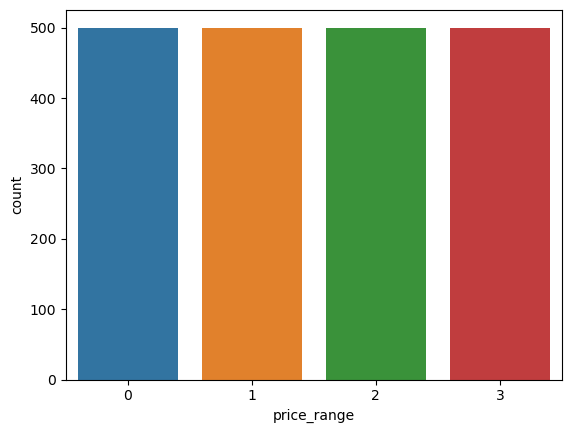

In [22]:
# CountPlot for various columns
for i in df_train:
    if(df_train[i].nunique()<30):
        sns.countplot(x=df_train[i])
        plt.show()

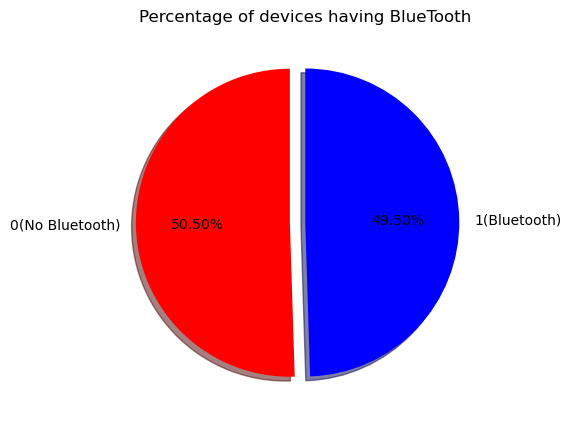

In [23]:
#Analysis based on Percentages using Pie Chart

#bluetooth devices

count=df_train["blue"].value_counts()
cls_label=['0(No Bluetooth)','1(Bluetooth)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=cls_label,startangle=90,colors=['red','blue'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having BlueTooth")
plt.show()

50.50% smartphones sold have BlueTooth and 49.50% doesn't have it.


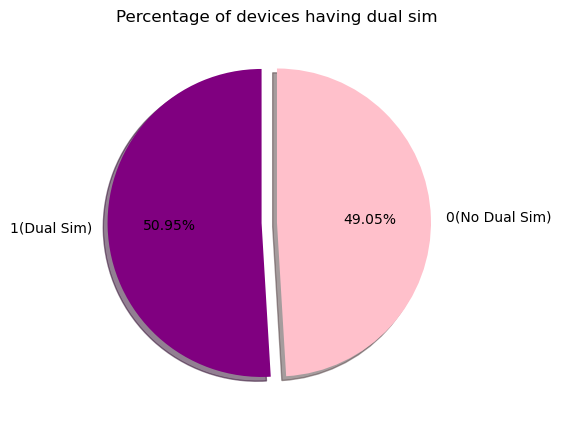

In [24]:
#dual sim

count=df_train["dual_sim"].value_counts()
label=['1(Dual Sim)','0(No Dual Sim)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,startangle=90,colors=['purple','pink'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having dual sim")
plt.show()

50.95% smartphones sold have dual sim and 49.05% doesn't have it.



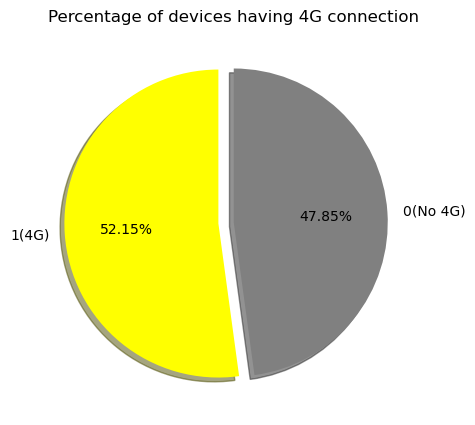

In [25]:
#4G
count=df_train["four_g"].value_counts()
label=['1(4G)','0(No 4G)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,startangle=90,colors=['yellow','grey'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having 4G connection")
plt.show()

52.15% smartphones have 4G connection and 47.85% doesn't have it.

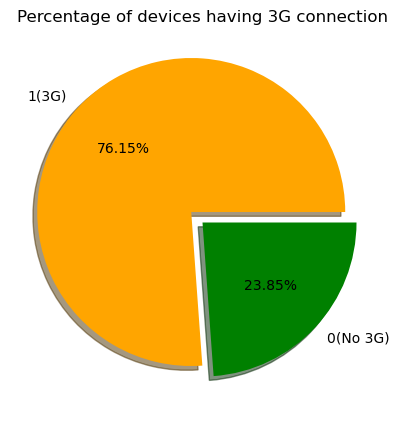

In [26]:
#3G

count=df_train["three_g"].value_counts()
label=['1(3G)','0(No 3G)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,colors=['orange','green'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having 3G connection")
plt.show()

76.15% smartphones have 3G connection and 23.85% doesn't have it.

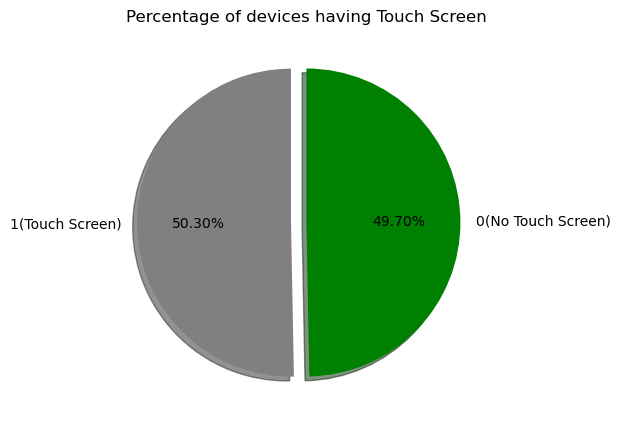

In [27]:
#Touch Screen
count=df_train["touch_screen"].value_counts()
cls_label=['1(Touch Screen)','0(No Touch Screen)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=cls_label,startangle=90,colors=['grey','green'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having Touch Screen")
plt.show()

50.30% smartphones sold have Touch screen and 49.70% doesn't have it.



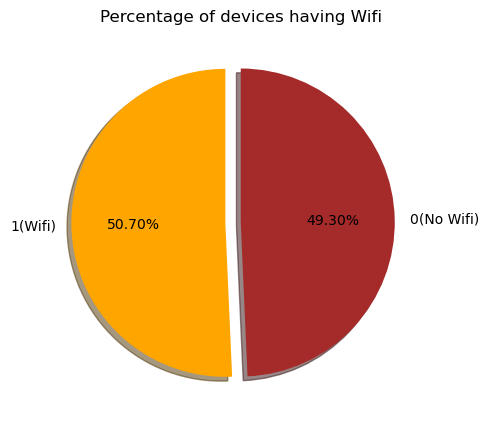

In [28]:
#Wifi
count=df_train["wifi"].value_counts()
label=['1(Wifi)','0(No Wifi)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,startangle=90,colors=['orange','brown'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having Wifi")
plt.show()

50.70% of the smartphones sold have wifi and 49.30% doesn't have it.



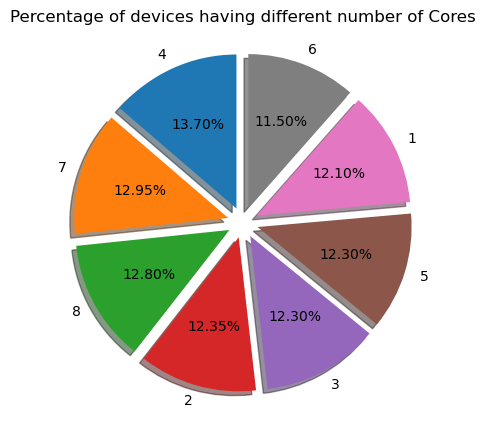

In [29]:
#Processors
count=df_train["n_cores"].value_counts()

        
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,startangle=90,autopct='%1.2f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.title("Percentage of devices having different number of Cores")
plt.show()

##### Smartphones with Quad Core are the most sought after.

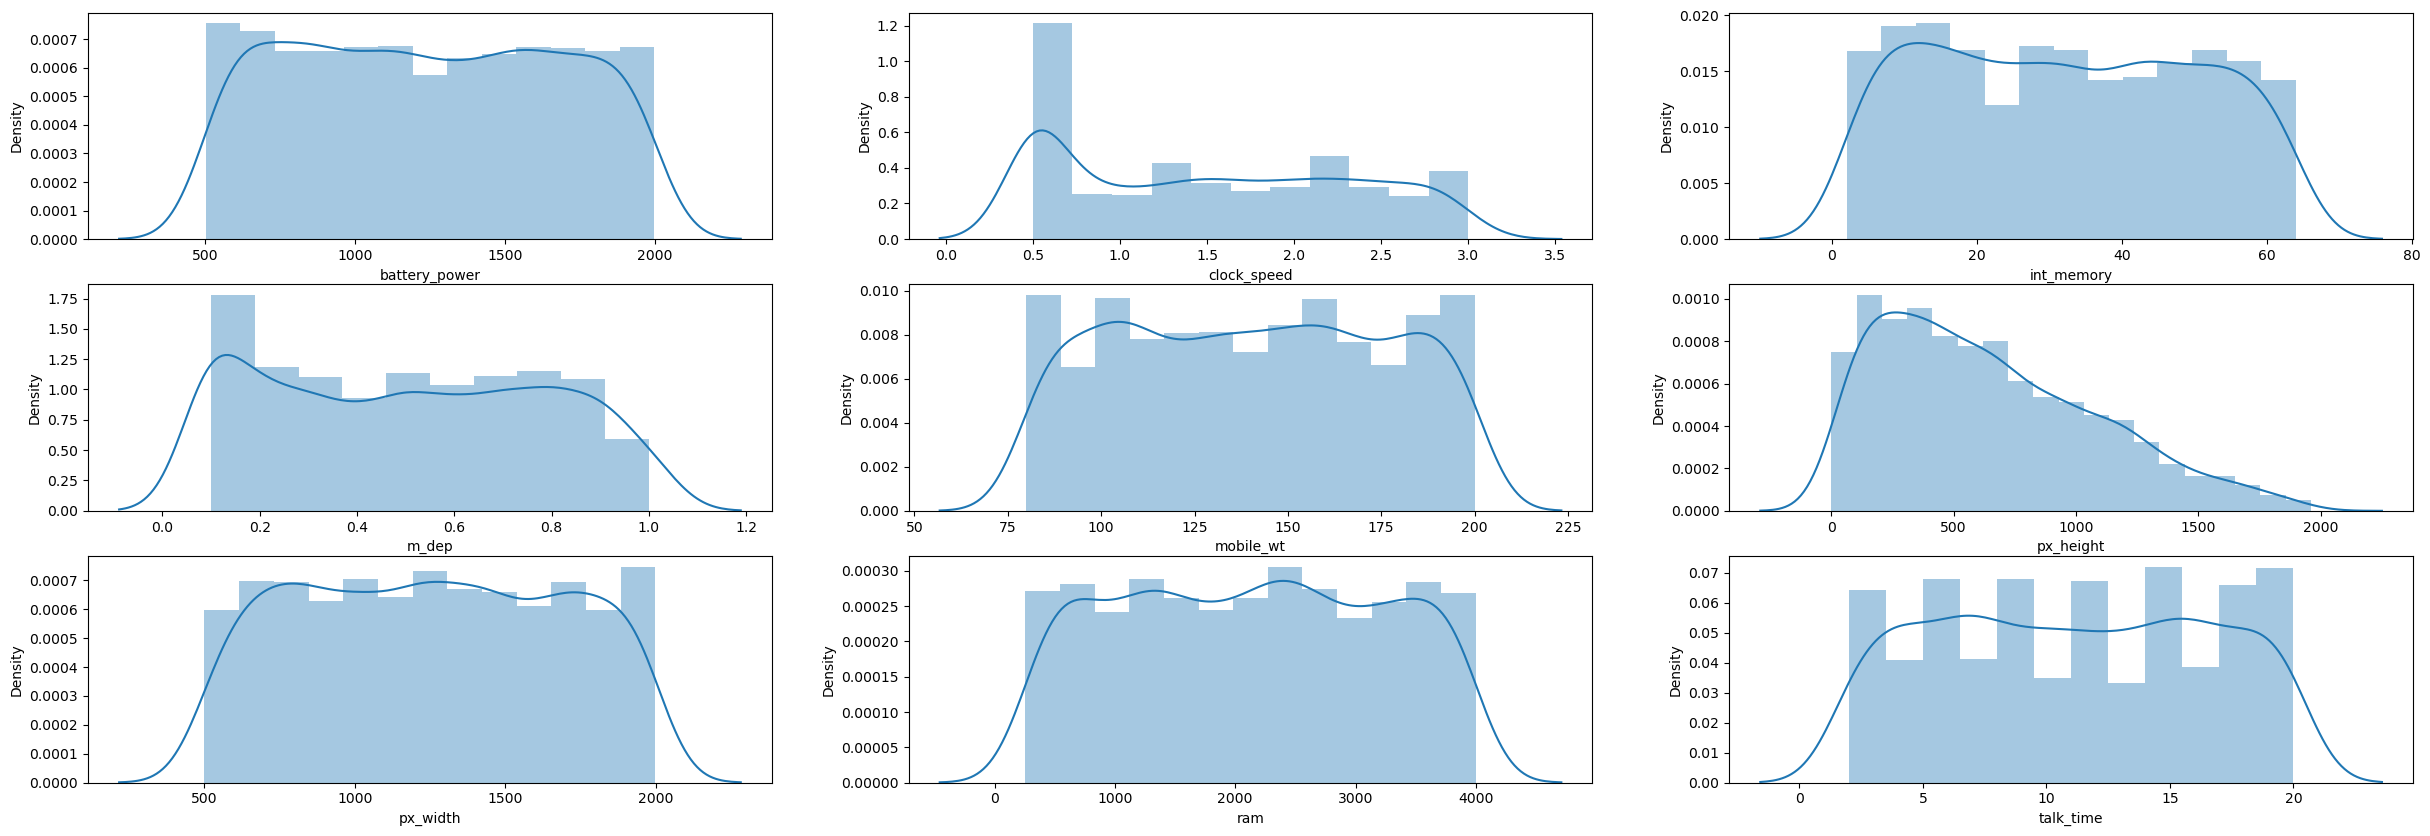

In [30]:
#Distplot for various columns
plt.figure(figsize = (30,10))
plt.subplot(331)
sns.distplot(df_train['battery_power'])
plt.subplot(332)
sns.distplot(df_train['clock_speed'])
plt.subplot(333)
sns.distplot(df_train['int_memory'])
plt.subplot(334)
sns.distplot(df_train['m_dep'])
plt.subplot(335)
sns.distplot(df_train['mobile_wt'])
plt.subplot(336)
sns.distplot(df_train['px_height'])
plt.subplot(337)
sns.distplot(df_train['px_width'])
plt.subplot(338)
sns.distplot(df_train['ram'])
plt.subplot(339)
sns.distplot(df_train['talk_time'])
plt.show()

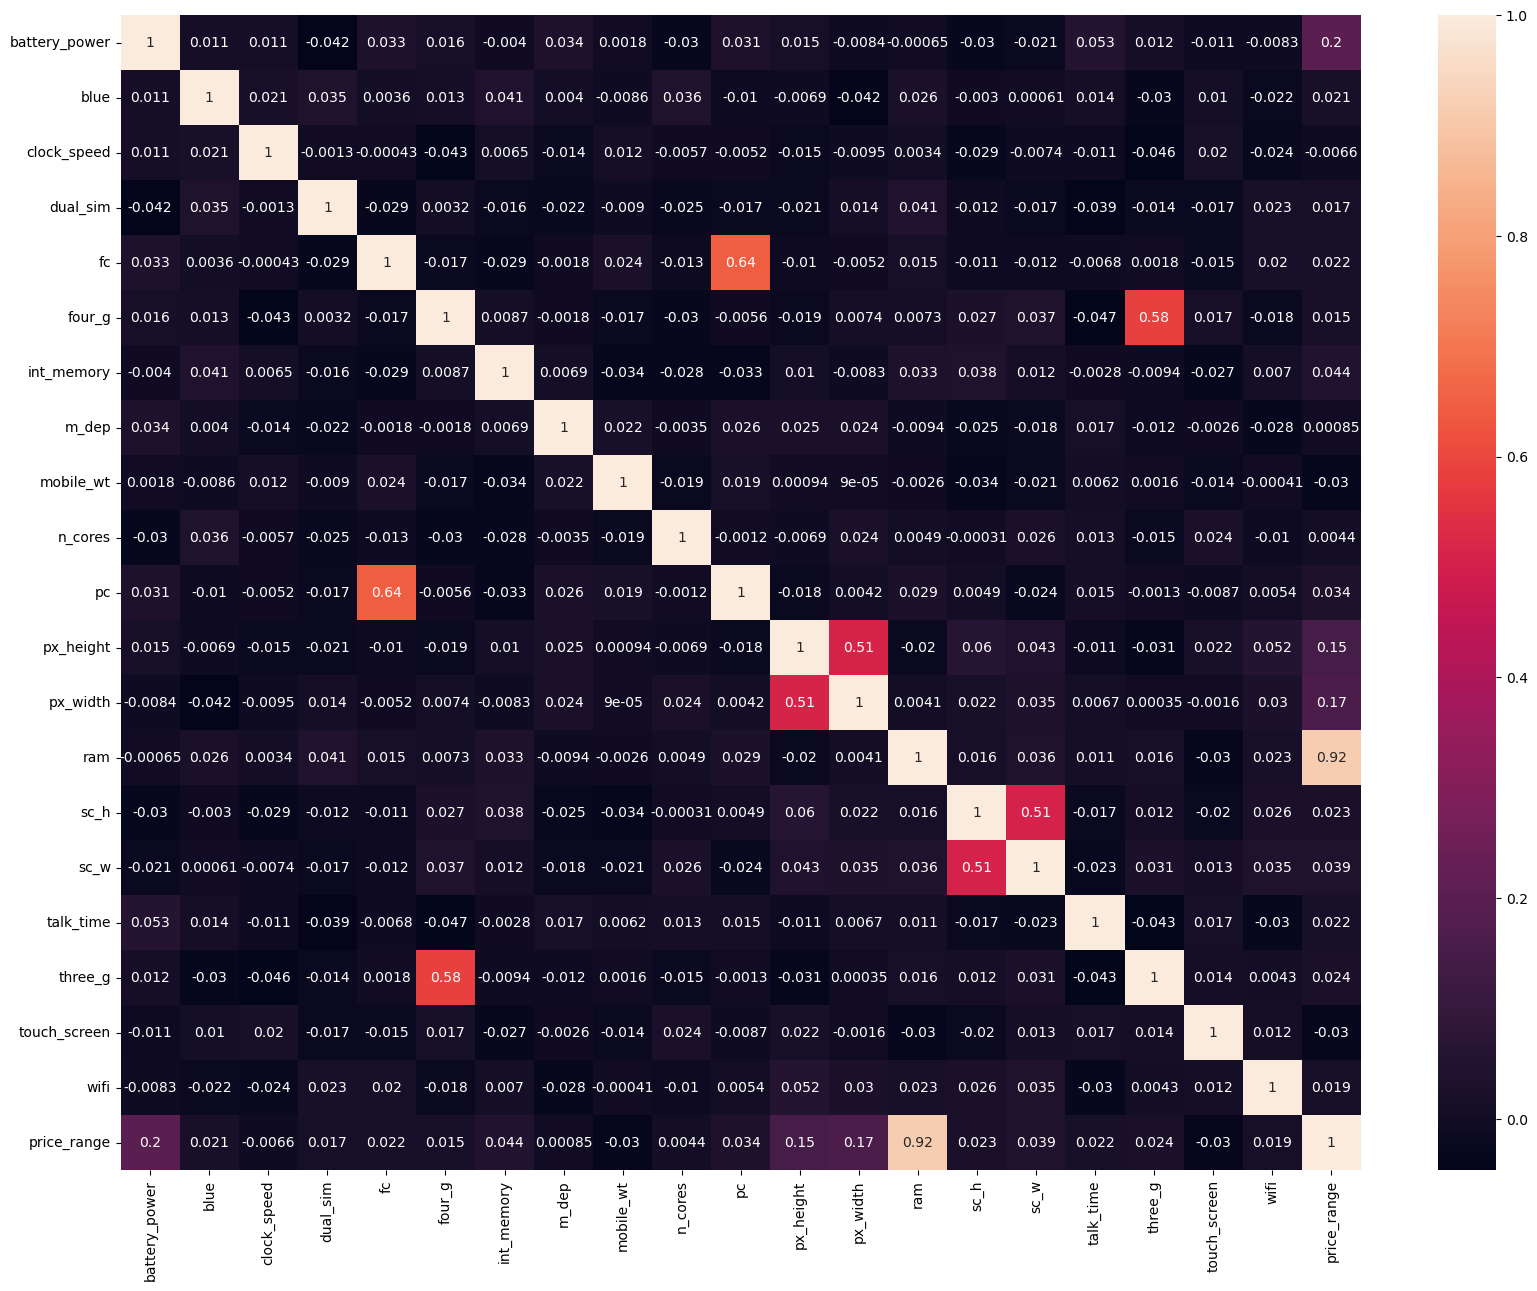

In [31]:
# Plotting correlation on a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

Almost all exhibit low correlation with eachother.

ram is highly correlated with price range. 

None of the features are negatively correlated.

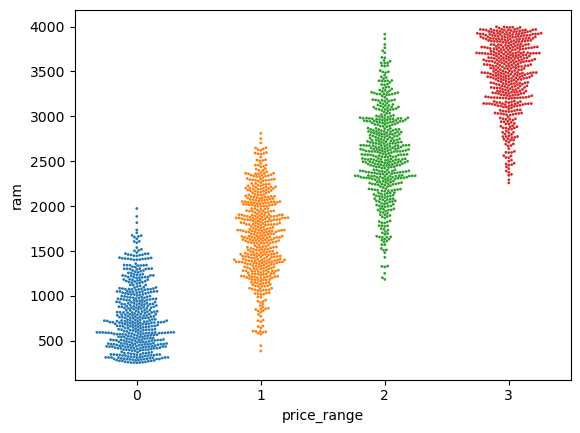

In [32]:
sns.swarmplot(x='price_range',y='ram',data=df_train, size=2)
plt.show()

Ram is highly correlated with price

# Outlier detection

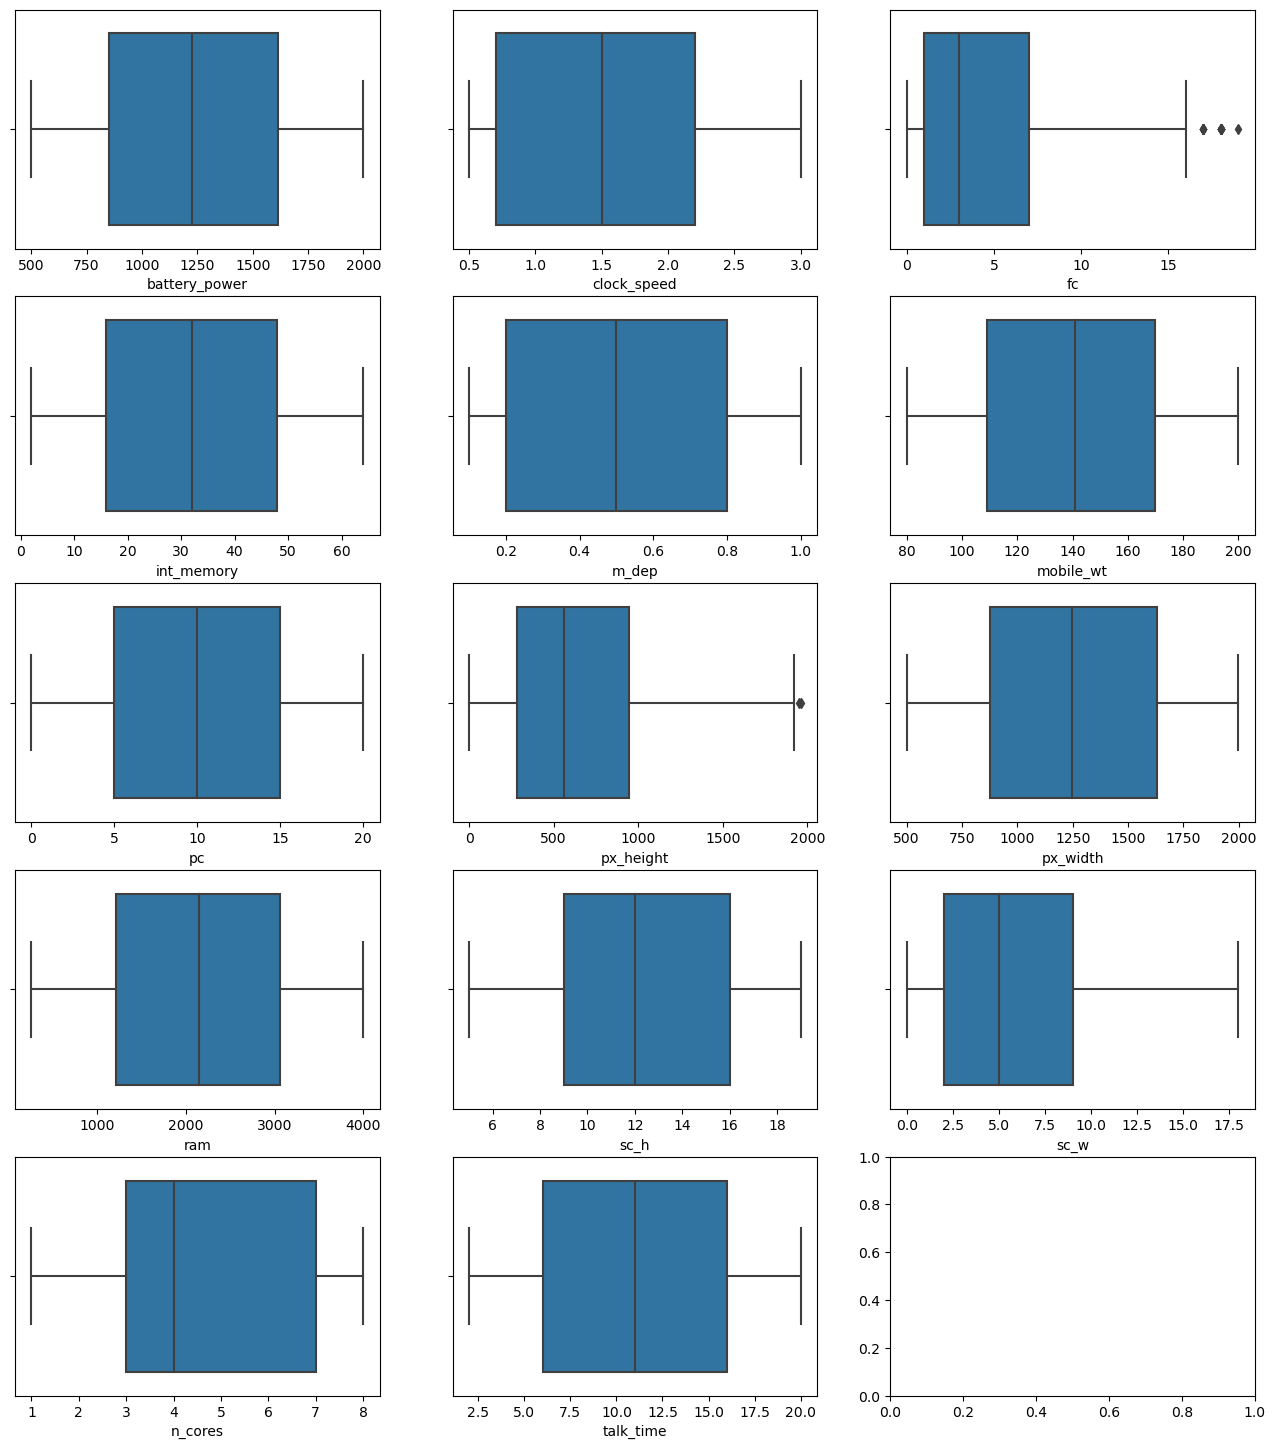

In [33]:
fig,axes = plt.subplots(5,3,figsize = (16,18))
sns.boxplot(x=df_train['battery_power'],ax=axes[0,0])
sns.boxplot( x=df_train['clock_speed'],ax=axes[0,1])
sns.boxplot( x= df_train['fc'],ax=axes[0,2])
sns.boxplot( x=df_train['int_memory'],ax=axes[1,0])
sns.boxplot( x=df_train['m_dep'],ax=axes[1,1])
sns.boxplot( x=df_train['mobile_wt'],ax=axes[1,2])
sns.boxplot( x=df_train['pc'],ax=axes[2,0])
sns.boxplot( x=df_train['px_height'],ax=axes[2,1])
sns.boxplot( x=df_train['px_width'],ax=axes[2,2])
sns.boxplot( x=df_train['ram'],ax=axes[3,0])
sns.boxplot( x=df_train['sc_h'],ax=axes[3,1])
sns.boxplot( x=df_train['sc_w'],ax=axes[3,2])
sns.boxplot(x=df_train['n_cores'],ax=axes[4,0])
sns.boxplot(x=df_train['talk_time'],ax=axes[4,1])

plt.show()

There are only few outliers in the dataset.Hence no need to remove those outliers.

# Classify the datset into software and hardware


In [34]:
df1 = df_train.loc[:,['battery_power','blue','four_g','mobile_wt','n_cores','px_height','px_width','price_range','talk_time','three_g','wifi','clock_speed']]
df1

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed
0,842,0,0,188,2,20,756,1,19,0,1,2.2
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,0,0.5
1996,1965,1,0,187,4,915,1965,2,16,1,1,2.6
1997,1911,0,1,108,8,868,1632,3,5,1,0,0.9
1998,1512,0,1,145,5,336,670,0,19,1,1,0.9


In [35]:
df2 = df_train.loc[:,['dual_sim','fc','m_dep','int_memory','pc','ram','sc_h','sc_w','touch_screen']]
df2

,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,0,1,0.6,7,2,2549,9,7,0
1,1,0,0.7,53,6,2631,17,3,1
2,1,2,0.9,41,6,2603,11,2,1
3,0,0,0.8,10,9,2769,16,8,0
4,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.8,2,14,668,13,4,1
1996,1,0,0.2,39,3,2032,11,10,1
1997,1,1,0.7,36,3,3057,9,1,1
1998,0,4,0.1,46,5,869,18,10,1


In [36]:
#Merging Datasets

In [37]:
df3 = pd.concat([df1, df2], axis=1)
df3

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,842,0,0,188,2,20,756,1,19,0,1,2.2,0,1,0.6,7,2,2549,9,7,0
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5,1,0,0.7,53,6,2631,17,3,1
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5,1,2,0.9,41,6,2603,11,2,1
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5,0,0,0.8,10,9,2769,16,8,0
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,0,0.5,1,0,0.8,2,14,668,13,4,1
1996,1965,1,0,187,4,915,1965,2,16,1,1,2.6,1,0,0.2,39,3,2032,11,10,1
1997,1911,0,1,108,8,868,1632,3,5,1,0,0.9,1,1,0.7,36,3,3057,9,1,1
1998,1512,0,1,145,5,336,670,0,19,1,1,0.9,0,4,0.1,46,5,869,18,10,1


# Ranking of features of smartphone

In [38]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [39]:
#Ranking dataset according to price range

df_train["rank_by_price"]=df_train["price_range"].rank()
df1=df_train
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,250.5


In [40]:
#Sorting above dataset according to ranked_price_range

df1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,14,366,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,15,119,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,12,191,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,16,172,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,15,713,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,0,259,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,3,236,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,0,650,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,14,829,1977,3458,9,4,9,1,1,1,3,1750.5


In [41]:
#Ranking on all the features using rank()

RankedData = df1.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,1394.5,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,1492.5,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,1212.5,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,1582.5,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,1492.5,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,51.0,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,351.0,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,51.0,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,1394.5,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [42]:
#Ranking all the features separately to correct output
#Because not all features are good when values are high or low
#It depends on each and every feature.
r= df1
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,1635.0,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,1388.5,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,868.5,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,630.5,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,1635.0,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,630.5,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,1128.5,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,128.5,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,868.5,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


In [43]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,1635.0,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,1388.5,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,868.5,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,630.5,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,1635.0,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,630.5,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,1128.5,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,128.5,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,868.5,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
